<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Plot-time-signal" data-toc-modified-id="Plot-time-signal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plot time signal</a></span><ul class="toc-item"><li><span><a href="#Using-the-scripting-interface" data-toc-modified-id="Using-the-scripting-interface-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Using the scripting interface</a></span></li><li><span><a href="#Using-the-function-library" data-toc-modified-id="Using-the-function-library-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Using the function library</a></span></li></ul></li>
    
 <li><span><a href="#Third-octave-spectrum" data-toc-modified-id="Third-octave-spectrum-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Third octave spectrum</a></span><ul class="toc-item"><li><span><a href="#Using-the-scripting-interface" data-toc-modified-id="Using-the-scripting-interface-2.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Using the scripting interface</a></span></li><li><span><a href="#Using-the-function-library" data-toc-modified-id="Using-the-function-library-2.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Using the function library</a></span></li></ul></li> 
    
<li><span><a href="#Overall-level" data-toc-modified-id="Overall-level-3"><span class="toc-item-num">2&nbsp;&nbsp;</span>Overall level</a></span><ul class="toc-item"><li><span><a href="#Using-the-scripting-interface" data-toc-modified-id="Using-the-scripting-interface-3.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Using the scripting interface</a></span></li><li><span><a href="#Using-the-function-library" data-toc-modified-id="Using-the-function-library-3.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Using the function library</a></span></li></ul></li> 

# Audio signal basic operations

This tutorial explains how to use MOSQITO to realise various basic operations from an audio signal.Two approaches are possible: scripting interface and function library. The users that just need to compute SQ metrics should preferably use the scripting interface approach. The function library approach is dedicated to users who would like to integrate MOSQITO functions in another software for instance.


In this example, the signal is imported from a .wav file. The tutorial [how to import a signal](./tuto_import_signal.ipynb) gives more information about the syntax of the import and the other supported file types.

## Plot time signal
### Using the scripting interface

c:\users\salomé\documents\scidatatool\SciDataTool\Functions\Plot\plot_2D.py:339: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


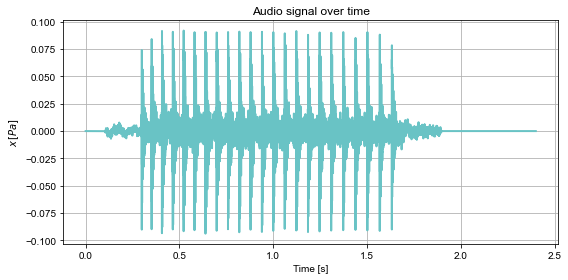

In [1]:
# Add MOSQITO to the Python path
import sys
sys.path.append('..')

# Import MOSQITO color sheme [Optional]
from mosqito import COLORS

# Import Audio class
from mosqito.classes.Audio import Audio

# Create an Audio object
woodpecker = Audio(
    "../mosqito/validations/loudness_zwicker/data/ISO_532-1/Annex B.5/Test signal 24 (woodpecker).wav",
    calib=2 * 2 ** 0.5,
)

# Plot time signal
woodpecker.signal.plot_2D_Data(
    "time",
    type_plot="curve",
    color_list=COLORS,
)

### Using the function library

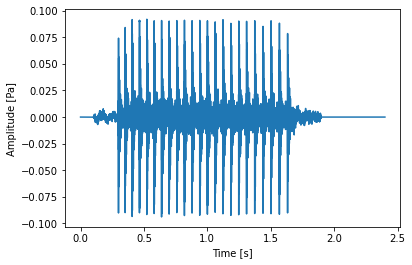

In [2]:
# Add MOSQITO to the Python path
import sys
sys.path.append('..')

# Import useful packages
import numpy as np
import matplotlib.pyplot as plt

# Import MOSQITO functions
from mosqito.functions.shared.load import load

# Load signal and compute third-octave spectrum
signal, fs = load(True,
    "../mosqito/validations/loudness_zwicker/data/ISO_532-1/Annex B.5/Test signal 24 (woodpecker).wav",
    calib=2 * 2 ** 0.5
                 )

# Plot the time signal
time = np.linspace(0,len(signal)/fs,len(signal))
plt.plot(time, signal)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude [Pa]")
plt.show()

## Third-octave spectrum
### Using the scripting interface

In [15]:
# Add MOSQITO to the Python path
import sys
sys.path.append('..')

# Import MOSQITO color sheme [Optional]
from mosqito import COLORS

# Import Audio class
from mosqito.classes.Audio import Audio

# Create an Audio object
pink_noise = Audio(
    "../mosqito/validations\loudness_zwicker\data\ISO_532-1\PinkNoise_40dBpHz@1000Hz.wav",
    calib=2 * 2 ** 0.5,
    is_stationary=False
)

# Compute third-octave spectrum
pink_noise.comp_3oct_spec()


The preceeding command line launched the computation of the third-octave spectrum that is now stored in the woodpecker object. The following command shows how to plot the spectrum. The argument "freqs" indicates the axis along which to plot, and the "time=1" takes the spectrum at 1 second. The optional type_plot argument is obviously used to specifies the plot type (among "curve", "bargraph", "barchart" and "quiver"). The optional color_list argument is used to specify the color scheme used for the plots.

c:\users\salomé\documents\scidatatool\SciDataTool\Functions\Plot\plot_2D.py:339: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


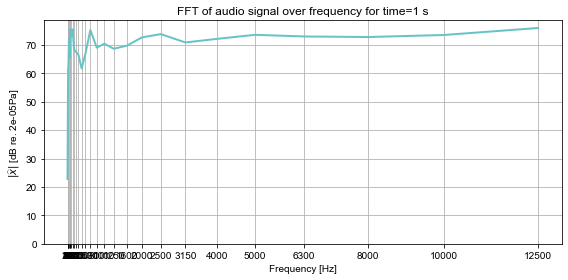

In [17]:
# Plot third-octave spectrum
pink_noise.third_spec.plot_2D_Data(
        "freqs",
        "time=1",
        type_plot="curve",
        y_min=0,
        unit="dB",
        color_list=COLORS
    )

### Using the function library

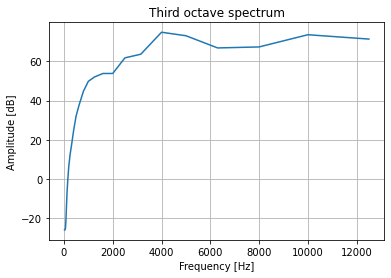

In [20]:
# Add MOSQITO to the Python path
import sys
sys.path.append('..')

# Import useful packages
import numpy as np
import matplotlib.pyplot as plt

# Import MOSQITO functions
from mosqito.functions.shared.load import load
from mosqito.functions.oct3filter.comp_third_spectrum import comp_third_spec

# Load signal
signal, fs = load(True,
    "../mosqito/validations\loudness_zwicker\data\ISO_532-1\PinkNoise_40dBpHz@1000Hz.wav",
    calib=2 * 2 ** 0.5,
                 )

# Compute third-octave spectrum
third_spec = comp_third_spec(False, signal, fs)

# Plot the third-octave spectrum
plt.plot(third_spec["freqs"], third_spec["values"][:,4])
plt.title("Third octave spectrum")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [dB]")
plt.grid()


## Overall level
### Using the scripting interface

work in progress

### Using the function library

work in progress